# Compare features over time
* Select a video. Must have the corresponding skel features in output/skel directory.
* Select 1 or more features. If exactly 2 features are selected, it will plot their relationship over time.
* Select a subset of video frames.


In [104]:
import pandas as pd
import panel as pn
import param
from glob import glob
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/bezdek/Documents/tracking/pysot')
from run_sem_with_features import preprocess_skel
pn.extension()

In [ ]:
title = '## Compare Features'
subtitle = 'Choose features and frames'
vids = glob(os.path.join('data','small_videos','*'))
vids = [os.path.basename(x) for x in vids]
vid_select = pn.widgets.Select(name='Select Video', options=vids)

skeldf = pd.read_csv(os.path.join('output','skel','4.4.5_skel_features.csv'))
allfeatures = skel_df.columns.tolist()
fmin = skel_df.index.min()
fmax = skel_df.index.max()

feature_select = pn.widgets.MultiSelect(name='Select Features', value=[allfeatures[0]],
    options=allfeatures, size=8)
frame_slider = pn.widgets.RangeSlider(name='Frame', format='0', start=fmin, end=fmax, step=1,value=(fmin,fmax))


@pn.depends(vid_select.param.value,watch=True)
def _update_options(vid_select):  
    skel_df = preprocess_skel(os.path.join('output','skel',vid_select.split('_')[0]+'_skel_features.csv'))
    allfeatures = skel_df.columns.tolist()
    fmin = skel_df.index.min()
    fmax = skel_df.index.max()
    feature_select.value = [allfeatures[0]]
    feature_select.options = allfeatures
    frame_slider.start = fmin
    frame_slider.end = fmax
    frame_slider.value = (fmin,fmax)

@pn.depends(feature_select.param.value, frame_slider.param.value)
def time_plot(feature_select,frame_slider): # start function
    df = skel_df.reset_index()
    df = df[(df['frame'] >= frame_slider[0]) & (df['frame'] <= frame_slider[1])]
    fig,ax = plt.subplots()
    for feat in feature_select:
        df.plot(kind='line', x='frame', y=feat, ax=ax)
    plt.show()
    return fig

@pn.depends(feature_select.param.value, frame_slider.param.value)
def pair_plot(feature_select,frame_slider): # start function
    df = skel_df.reset_index()
    df = df[(df['frame'] >= frame_slider[0]) & (df['frame'] <= frame_slider[1])]
    fig,ax = plt.subplots()
    if len(feature_select) == 2:
        df.plot(kind='scatter', x=feature_select[0], y=feature_select[1],c=df['frame'],colormap='viridis',ax=ax)
    #plt.show()
    return fig

# Arrange dashboard elements
dashboard = pn.Row(
    pn.Column(title, subtitle,vid_select, feature_select, frame_slider),
    pn.Column(time_plot,pair_plot)
)

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Select(options=['6.3.1_C1_trim.mp4', ...], value='6.3.1_C1_trim.mp4')
        [3] MultiSelect(name='Select Features', options=['J0_3D_X', 'J0_3D_Y', ...], size=8, value=['J0_3D_X'])
        [4] RangeSlider(end=17460, format='0', name='Frame', start=89, step=1, value=(89, 17460), value_throttled=(89, 17460))
    [1] Column
        [0] ParamFunction(function)
        [1] ParamFunction(function)
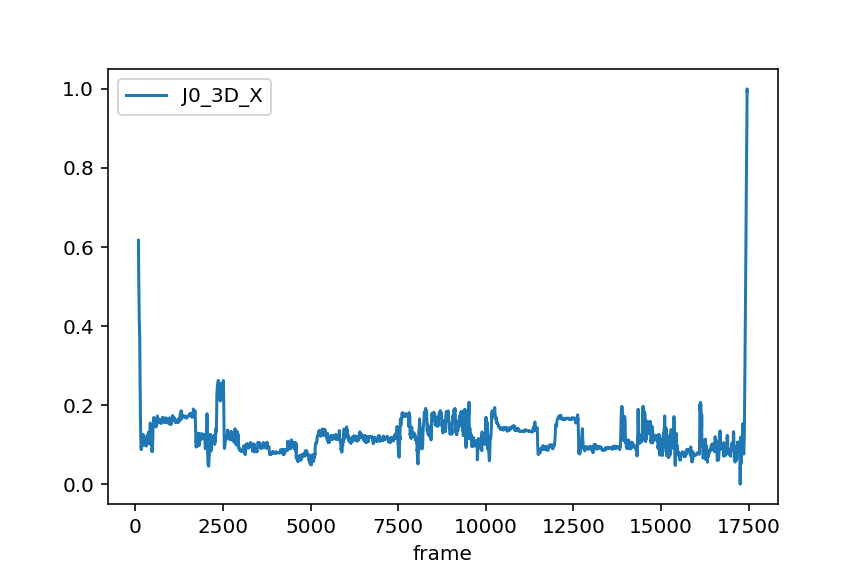
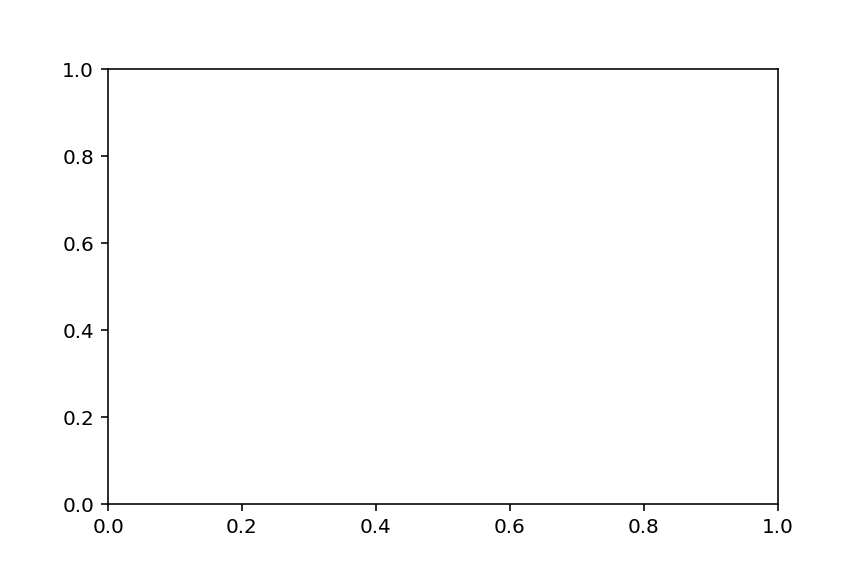

In [106]:
# Launch the dashboard
dashboard.servable()